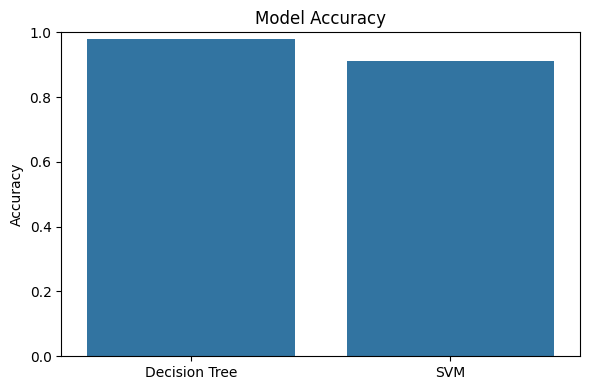

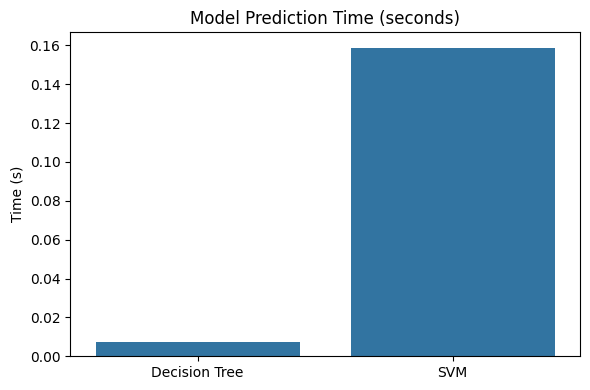

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98        89
           1       0.99      0.97      0.98        89
           2       0.96      1.00      0.98        22

    accuracy                           0.98       200
   macro avg       0.97      0.99      0.98       200
weighted avg       0.98      0.98      0.98       200

SVM Report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        89
           1       0.90      0.91      0.91        89
           2       0.89      0.77      0.83        22

    accuracy                           0.91       200
   macro avg       0.91      0.88      0.89       200
weighted avg       0.91      0.91      0.91       200


--- Real-Time Health Status Prediction ---


Patient's Name:  Jason
Age:  22
Gender (Male/Female):  Male
Weight (kg):  55
Temperature (F):  98
SpO2 (%):  100
Heart Rate (bpm):  78



Jason's Health Status:
Condition: Healthy

--- Model Performance Summary ---
Decision Tree :
 - Accuracy: 98.00%
 - Time: 0.0072 seconds
SVM           :
 - Accuracy: 91.00%
 - Time: 0.1588 seconds

 Model performed best overall: Decision Tree


In [1]:
# Silent installation
!pip install -q scikit-learn pandas numpy matplotlib seaborn

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Imports
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Load dataset
file_path = r"C:\Users\jason\Desktop\ML-Health-Monitoring-Investigation\health_monitoring_dataset.csv"
df = pd.read_csv(file_path)

# Preprocess data
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Health Status'] = df['Health Status'].map({'Healthy': 0, 'At Risk': 1, 'Unhealthy': 2})

X = df.drop('Health Status', axis=1)
y = df['Health Status']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Decision Tree
start_dt = time.time()
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
time_dt = time.time() - start_dt
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# SVM
start_svm = time.time()
svm = SVC(probability=True, random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
time_svm = time.time() - start_svm
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Visualization
plt.figure(figsize=(6, 4))
models = ['Decision Tree', 'SVM']
accuracies = [accuracy_dt, accuracy_svm]
times = [time_dt, time_svm]

sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=times)
plt.title('Model Prediction Time (seconds)')
plt.ylabel('Time (s)')
plt.tight_layout()
plt.show()

# Print classification reports
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))
print("SVM Report:\n", classification_report(y_test, y_pred_svm))

# Real-time prediction input
def real_time_prediction():
    print("\n--- Real-Time Health Status Prediction ---")
    name = input("Patient's Name: ")
    age = int(input("Age: "))
    gender = input("Gender (Male/Female): ")
    weight = float(input("Weight (kg): "))
    temp = float(input("Temperature (F): "))
    spo2 = float(input("SpO2 (%): "))
    bpm = int(input("Heart Rate (bpm): "))

    gender_encoded = le.transform([gender])[0]
    input_data = pd.DataFrame([[temp, spo2, bpm, weight, gender_encoded, age]],
                              columns=['Temperature (F)', 'SpO2 (%)', 'Heart Rate (bpm)',
                                       'Weight (kg)', 'Gender', 'Age'])
    input_scaled = scaler.transform(input_data)

    prediction = svm.predict(input_scaled)[0]
    probs = svm.predict_proba(input_scaled)[0]
    health_map = {0: 'Healthy', 1: 'At Risk', 2: 'Unhealthy'}
    result = health_map[prediction]

    print(f"\n{name}'s Health Status:")
    print(f"Condition: {result}")

    if result == 'Healthy':
        return

    
    # Identify possible reason by checking feature contributions (simplified)
    patient_row = input_scaled[0]
    avg_row = X_scaled.mean(axis=0)
    diffs = patient_row - avg_row
    feature_names = X.columns
    top_factors = np.argsort(np.abs(diffs))[::-1][:2]
    reasons = [feature_names[i] for i in top_factors]
    print("Possible contributing factors:")
    for r in reasons:
        print(f"- {r}")

# Run real-time prediction
real_time_prediction()

print("\n--- Model Performance Summary ---")
print(f"Decision Tree :\n - Accuracy: {accuracy_dt*100:.2f}%\n - Time: {time_dt:.4f} seconds")
print(f"SVM           :\n - Accuracy: {accuracy_svm*100:.2f}%\n - Time: {time_svm:.4f} seconds")

best_model = "Decision Tree" if accuracy_dt > accuracy_svm else "SVM"
print(f"\n Model performed best overall: {best_model}")
